In [13]:
import numpy as np
import os
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
# Show plots inline in notebook
%matplotlib inline

### My Wonderful Report

In [2]:
common_data_path = 'Data/USCensusACS/IncomeAndOccupancySeattle/'
# Read in the census data, using the GEO.id column as the index
df2012 = pd.read_csv(os.path.join(common_data_path, 'ACS_12_1YR_B25118_with_ann.csv'),
                    index_col='GEO.id')
#print(df2012)

df2013 = pd.read_csv(os.path.join(common_data_path, 'ACS_13_1YR_B25118_with_ann.csv'),
                    index_col='GEO.id')
#print(df2012)

df2014 = pd.read_csv(os.path.join(common_data_path, 'ACS_14_1YR_B25118_with_ann.csv'),
                    index_col='GEO.id')

In [3]:
print(df2012['HD01_VD03'])

GEO.id
Id                  Estimate; Owner occupied: - Less than $5,000
0400000US53                                                25022
1600000US5363000                                            2069
Name: HD01_VD03, dtype: object


In [4]:
type(df2012)

pandas.core.frame.DataFrame

In [5]:
df2012.index

Index(['Id', '0400000US53', '1600000US5363000'], dtype='object', name='GEO.id')

In [6]:
seattle2012 = df2012.loc['1600000US5363000']
print(seattle2012[['HD01_VD01']])
type(seattle2012)

HD01_VD01    289790
Name: 1600000US5363000, dtype: object


pandas.core.series.Series

In [36]:
def income_bracket_buckets(df):
    """ Return two Series of Seattle renters by income bracket, and owners by income bracket """

    seattle_row = df.loc['1600000US5363000']
    #print("ibb: seattle_row={0}".format(seattle_row))
    #print("ibb: read csv default type = {0}".format(type(seattle_row.HD01_VD13)))
    
    ##
    # Owner
    seattle_owner = Series([0] * 5, 
                           #index=['>$150K', '$100K-$150K', '$75K-$100K', '$50K-$75K', '<$50K'])
                            index=['<$50K', '$50K-$75K','$75K-$100K','$100K-$150K', '>$150K'])
    seattle_owner['>$150K'] = int(seattle_row.HD01_VD13)
    seattle_owner['$100K-$150K'] = int(seattle_row.HD01_VD12)
    seattle_owner['$75K-$100K'] = int(seattle_row.HD01_VD11)
    seattle_owner['$50K-$75K'] = int(seattle_row.HD01_VD10)
    # Under 50K has multiple sub-buckets that will be combined into one here
    owner_under50K_cols = ['HD01_VD03', 'HD01_VD04', 'HD01_VD05', 'HD01_VD06', 
                         'HD01_VD07', 'HD01_VD08', 'HD01_VD09']
    # Convert <50K cells from string to integer before summing
    seattle_row[owner_under50K_cols] = seattle_row[owner_under50K_cols].astype('int')
    seattle_owner['<$50K'] = seattle_row[owner_under50K_cols].values.sum()
    #print(seattle_owner)
    
    ##
    # Renter
    seattle_renter = Series([0] * 5, 
                           #index=['>$150K', '$100K-$150K', '$75K-$100K', '$50K-$75K', '<$50K'])
                            index=['<$50K', '$50K-$75K','$75K-$100K','$100K-$150K', '>$150K'])
    seattle_renter['>$150K'] = int(seattle_row.HD01_VD25)
    seattle_renter['$100K-$150K'] = int(seattle_row.HD01_VD24)
    seattle_renter['$75K-$100K'] = int(seattle_row.HD01_VD23)
    seattle_renter['$50K-$75K'] = int(seattle_row.HD01_VD22)
    # Under 50K has multiple sub-buckets that will be combined into one here
    renter_under50K_cols = ['HD01_VD15', 'HD01_VD16', 'HD01_VD17', 'HD01_VD18', 
                         'HD01_VD19', 'HD01_VD20', 'HD01_VD21']
    # Convert <50K cells from string to integer before summing
    seattle_row[renter_under50K_cols] = seattle_row[renter_under50K_cols].astype('int')
    seattle_renter['<$50K'] = seattle_row[renter_under50K_cols].values.sum()    
    return (seattle_owner, seattle_renter)

In [37]:
owner2012, renter2012 = income_bracket_buckets(df2012)
owner2013, renter2013 = income_bracket_buckets(df2013)
owner2014, renter2014 = income_bracket_buckets(df2014)

print("Owner2012:\n{0}".format(owner2012))
print("Owner2013:\n{0}".format(owner2013))
print("Owner2014:\n{0}".format(owner2014))
print("Renter2012:\n{0}".format(renter2012))
print("Renter2013:\n{0}".format(renter2013))
print("Renter2014:\n{0}".format(renter2014))

Owner2012:
<$50K          28746
$50K-$75K      21803
$75K-$100K     18994
$100K-$150K    27618
>$150K         35727
dtype: int64
Owner2013:
<$50K          27436
$50K-$75K      21317
$75K-$100K     17483
$100K-$150K    29966
>$150K         41538
dtype: int64
Owner2014:
<$50K          26062
$50K-$75K      19346
$75K-$100K     16652
$100K-$150K    29107
>$150K         47471
dtype: int64
Renter2012:
<$50K          85239
$50K-$75K      28030
$75K-$100K     17701
$100K-$150K    17836
>$150K          8096
dtype: int64
Renter2013:
<$50K          82925
$50K-$75K      27253
$75K-$100K     18153
$100K-$150K    19025
>$150K         12824
dtype: int64
Renter2014:
<$50K          86740
$50K-$75K      26894
$75K-$100K     17325
$100K-$150K    20883
>$150K         14084
dtype: int64


In [38]:
# Merge tables into dataframe
seattleOwnerRenter = DataFrame({'Owner2012': owner2012,
                                'Owner2013': owner2013,
                                'Owner2014': owner2014,
                                'Renter2012': renter2012,
                                'Renter2013': renter2013,
                                'Renter2014': renter2014})
print(seattleOwnerRenter)

             Owner2012  Owner2013  Owner2014  Renter2012  Renter2013  \
<$50K            28746      27436      26062       85239       82925   
$50K-$75K        21803      21317      19346       28030       27253   
$75K-$100K       18994      17483      16652       17701       18153   
$100K-$150K      27618      29966      29107       17836       19025   
>$150K           35727      41538      47471        8096       12824   

             Renter2014  
<$50K             86740  
$50K-$75K         26894  
$75K-$100K        17325  
$100K-$150K       20883  
>$150K            14084  


In [39]:
# Add columns with percentage change 2012:2013 and 2013:2014, renters and owners
sor = seattleOwnerRenter
renterPctChg12_13 = (sor.Renter2013 - sor.Renter2012) / sor.Renter2012 * 100
renterPctChg13_14 = (sor.Renter2014 - sor.Renter2013) / sor.Renter2013 * 100
ownerPctChg12_13 = (sor.Owner2013 - sor.Owner2012) / sor.Owner2012 * 100
ownerPctChg13_14 = (sor.Owner2014 - sor.Owner2013) / sor.Owner2013 * 100

seattleOwnerRenter['OwnerPctChg2012_2013'] = ownerPctChg12_13
seattleOwnerRenter['OwnerPctChg2013_2014'] = ownerPctChg13_14
seattleOwnerRenter['RenterPctChg2012_2013'] = renterPctChg12_13
seattleOwnerRenter['RenterPctChg2013_2014'] = renterPctChg13_14
#print("{0:.2f}".format(seattleOwnerRenter))
pd.options.display.float_format = '{:,.2f}'.format
print(seattleOwnerRenter)

             Owner2012  Owner2013  Owner2014  Renter2012  Renter2013  \
<$50K            28746      27436      26062       85239       82925   
$50K-$75K        21803      21317      19346       28030       27253   
$75K-$100K       18994      17483      16652       17701       18153   
$100K-$150K      27618      29966      29107       17836       19025   
>$150K           35727      41538      47471        8096       12824   

             Renter2014  OwnerPctChg2012_2013  OwnerPctChg2013_2014  \
<$50K             86740                 -4.56                 -5.01   
$50K-$75K         26894                 -2.23                 -9.25   
$75K-$100K        17325                 -7.96                 -4.75   
$100K-$150K       20883                  8.50                 -2.87   
>$150K            14084                 16.27                 14.28   

             RenterPctChg2012_2013  RenterPctChg2013_2014  
<$50K                        -2.71                   4.60  
$50K-$75K           

In [40]:
type(seattleOwnerRenter.RenterPctChg2012_2013['>$150K'])

numpy.float64

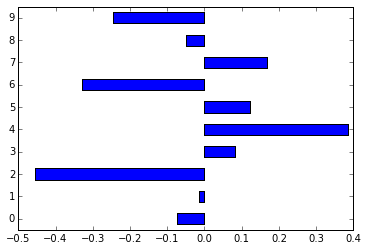

In [41]:
# Test use of matplotlib inside python notebook
# Make a bar plot of a small series of 10 random values centered at 0
seedval=206
np.random.seed(seedval)
s = Series(np.random.rand(10) - 0.5)
s.plot(kind='barh'); # Use semi-colon to suppress Notebooks Out[] output

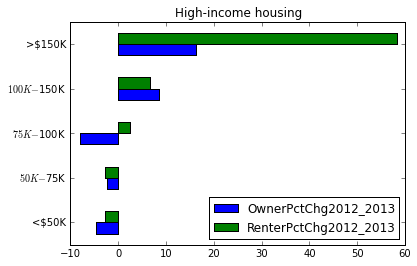

In [42]:
# First pass at plotting rent vs buy

# Get the subset of data to plot
sorsub = sor[['OwnerPctChg2012_2013','RenterPctChg2012_2013']]
# Desired order of columns, left to right (top to bottom): ,index=['>$150K', '$100K-$150K', '$75K-$100K', '$50K-$75K', '<$50K']
plt.figure();
sorsub.plot(kind='barh', title='High-income housing');

In [35]:
sorsub.index

Index(['$100K-$150K', '$50K-$75K', '$75K-$100K', '<$50K', '>$150K'], dtype='object')